In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes import param
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
plt.style.use(Cstyle.style1)
import time
import h5py
from matplotlib import gridspec
from data_analysis_codes.tools import ODUDLoc
import pandas as pd
from data_analysis_codes.tools import TAradius
from data_analysis_codes.tools import GetVars_Plot2d as GVar
from IPython.display import display, Math

In [2]:
def collect(p, zevars):
    pd = RPlot.getdata(p, zevars)
    e = RPlot.geterror(p, 'h5', zevars)
    Lin = LinData.LinData_Class(p, '/home/robynm/simulations/'+p.sim_name+'/')
    return {'param':p, 'data':pd, 'error':e, 'lin':Lin}

In [3]:
V=['a_OD', 'a_avvol', 'dK_OD', 'drho_OD']
p_EdS = collect(param.pflrw_d3e2_L1821_t1_N128_LCDM(), V)

 read time file


In [4]:
d = p_EdS['data']['drho_OD']
dlin = p_EdS['lin'].drho('h5', 'OD')
an = p_EdS['data']['an']
aOD = p_EdS['data']['a_OD']
anOD = aOD/aOD[0]
aD = p_EdS['data']['a_avvol']
anD = aD/aD[0]
dK = p_EdS['data']['dK_OD']

print('INITIALLY')
display(Math(r'z_{IN}'+' = {:.4e}'.format(p_EdS['data']['z'][0])))
display(Math(r'\lambda_{pert}'+' = {:.4e}'.format(p_EdS['param'].lambda_pert)))
display(Math(r'\delta = {:.10f}'.format(d[0])))
display(Math(r'dt = {:.3e}'.format(p_EdS['param'].dtfac*p_EdS['param'].dx)))

print('\n AT TURN AROUND')
iTA = np.argmin(abs(dK+1)[:-1])
display(Math(r'a/a_{IN}'+' = {:.9f}, \;\;\;  {:.4f}'.format(an[iTA], an[iTA+1])))
display(Math(r'a_{OD}/a_{OD,\;IN}'+' = {:.9f}, \;\;\;  {:.4f}'.format(anOD[iTA], anOD[iTA+1])))
display(Math(r'\langle a\rangle_{\mathcal{D}}/\langle a\rangle_{\mathcal{D}, IN}'+' = {:.9f}, \;\;\;  {:.4f}'.format(anD[iTA], anD[iTA+1])))
display(Math(r'\delta^{(1)}'+' = {:.10f}, \;\;\;  {:.4f}'.format(dlin[iTA], dlin[iTA+1])))
display(Math(r'\delta = {:.10f}, \;\;\;  {:.4f}'.format(d[iTA], d[iTA+1])))
display(Math(r'\delta K = {:.4f}, \;\;\;  {:.4f}'.format(dK[iTA], dK[iTA+1])))


print('\n RIGHT BEFORE CRASH')
display(Math(r'\delta = {:.10f}'.format(d[-1])))
display(Math(r'\delta^{(1)}'+' = {:.10f}'.format(dlin[-1])))
display(Math(r'a/a_{IN}'+' = {:.9}'.format(an[-1])))
display(Math(r'a_{OD}/a_{OD,\;IN}'+' = {:.9}'.format(anOD[-2])))
display(Math(r'\langle a\rangle_{\mathcal{D}}/\langle a\rangle_{\mathcal{D}, IN}'+' = {:.9}'.format(anD[-2])))
display(Math(r'\delta K = {:.4f}'.format(dK[-1])))

INITIALLY


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 AT TURN AROUND


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


 RIGHT BEFORE CRASH


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
def lin_fit(x, y, i, x_final):
    a = (y[i]-y[i+1])/(x[i]-x[i+1])
    b = y[i]-x[i]*a
    return a*x_final+b

In [6]:
print('\n AT TURN AROUND')
anF = np.arange(35.19, 35.25, 1e-8)
anOD_fit = lin_fit(an, anOD, iTA, anF)
anD_fit = lin_fit(an, anD, iTA, anF)
dK_fit = lin_fit(an, dK, iTA, anF)
iTA_fit = np.argmin(abs(dK_fit+1))
d_fit = lin_fit(an, d, iTA, anF)
dlin_fit = lin_fit(an, dlin, iTA, anF)

display(Math(r'a/a_{IN}'+' = {:.9f}'.format(anF[iTA_fit])))
display(Math(r'a_{OD}/a_{OD,\;IN}'+' = {:.9f}'.format(anOD_fit[iTA_fit])))
display(Math(r'\langle a\rangle_{\mathcal{D}}/\langle a\rangle_{\mathcal{D}, IN}'+' = {:.9f}'.format(anD_fit[iTA_fit])))
display(Math(r'\delta^{(1)}'+' = {:.10f}'.format(dlin_fit[iTA_fit])))
display(Math(r'\delta = {:.10f}'.format(d_fit[iTA_fit])))
display(Math(r'\delta K = {:.4f}'.format(dK_fit[iTA_fit])))


 AT TURN AROUND


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.5, 0, '$a/a_{IN}$')

/home/robynm/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


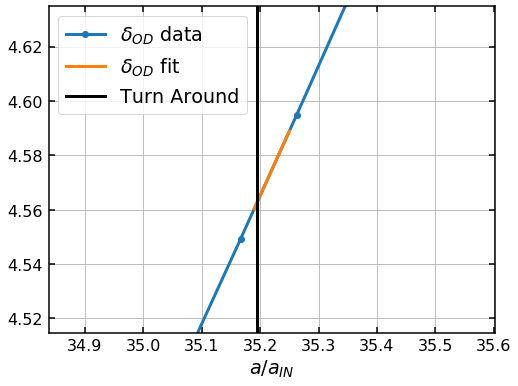

In [7]:
plt.plot(an, d, marker='o', label=r'$\delta_{OD}$ data')
plt.plot(anF, d_fit, label=r'$\delta_{OD}$ fit')
#plt.plot(an, dK)
plt.xlim(min(anF)*0.99, max(anF)*1.01)
plt.ylim(min(d_fit)*0.99, max(d_fit)*1.01)
plt.axvline(x=anF[iTA_fit], color='k', label='Turn Around')
plt.legend()
plt.grid()
plt.xlabel(r'$a/a_{IN}$')

Text(0.5, 0, '$a/a_{IN}$')

/home/robynm/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


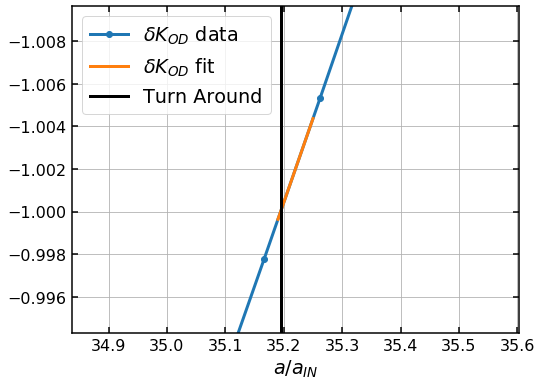

In [8]:
plt.plot(an, dK, marker='o', label=r'$\delta K_{OD}$ data')
plt.plot(anF, dK_fit, label=r'$\delta K_{OD}$ fit')
#plt.plot(an, dK)
plt.xlim(min(anF)*0.99, max(anF)*1.01)
plt.ylim(min(dK_fit)*0.99, max(dK_fit)*1.01)
plt.axvline(x=anF[iTA_fit], color='k', label='Turn Around')
plt.legend()
plt.grid()
plt.xlabel(r'$a/a_{IN}$')

In [9]:
1.06/0.03, 1.0573/0.03

(35.333333333333336, 35.24333333333333)

In [10]:
100*(1.0573/1.06-1)

-0.25471698113208596

In [11]:
print('Top Hat')

print('TA=', 1.06/pd0['drho_'+loc][0])
print('V=', 1.68/pd0['drho_'+loc][0])

Top Hat


NameError: name 'pd0' is not defined

In [ ]:
print('At OD Turn Around')
loc = 'OD'
"""i=0
while rmax[i]==rmax[0]:
    anTA = an[i]
    i +=1"""

print(pd0['drho_'+loc][0])

itTA = np.argmin(abs(pd0['K_'+loc][:-1]))
#itTA = int(Lin.temp_from_temp('it', 't', 209.74))
#print(itTA)
anTA = pd0['an'][itTA]
print('a/aIN = {}'.format(anTA))

tTA = Lin.temp_from_temp('t', 'an', anTA)
print('t     = {:.2f}'.format(tTA))
print('dt     = {}'.format(tTA-p.t_initial))

d1TA = Lin.delta(tTA, loc=loc)
print('delta linear = {}'.format(d1TA))
print('delta linear = {}'.format(pd0['drho_'+loc][0]*anTA))

dfTA = pd0['drho_'+loc][itTA]
print('delta full   = {}'.format(dfTA))

In [ ]:
print('At OD Virialisation')

tV = 2*tTA

anV = Lin.temp_from_temp('an', 't', tV)
print('a/aIN = {:.2f}'.format(anV))
print('t     = {:.2f}'.format(tV))
print('dt     = {:.2f}'.format(tV-p.t_initial))

d1V = Lin.delta(tV, loc='OD')
print('delta linear = {}'.format(d1V))
print('delta linear = {}'.format(pd0['drho_'+loc][0]*anV))

itV = np.argmin(abs(pd0['an'][:-1]-anV))
dfV = pd0['drho_OD'][itV]
print('delta full   = {:.2f}'.format(dfV))

In [ ]:
print('At crash')
tC = pd0['t'][-1]

anC = Lin.temp_from_temp('an', 't', tC)
print('a/aIN = {}'.format(anC))
print('t     = {:.2f}'.format(tC))
print('dt     = {}'.format(tC-p.t_initial))

d1C = Lin.delta(tC, loc=loc)
print('delta linear = {:.2f}'.format(d1C))
print('delta linear = {}'.format(pd0['drho_'+loc][0]*anC))

itC = np.argmin(abs(pd0['an'][:-1]-anC))
dfC = pd0['drho_'+loc][-1]
print('delta full   = {}'.format(dfC))

In [ ]:
1.2326/0.0221

In [ ]:
# EB & MB
tIN = 1
aIN = 1

tta = tIN*60**(3/2)-tIN
print('t = ', tta)
print('t = ', tIN*96**(3/2)-tIN, 2*tta)

In [ ]:
# Vitorio

d = pd0['drho_OD'][0]*(1+pd0['z'][0])
dcrit = (1/p.Omega_m_today-1)
D = d-dcrit
A = 2*Lin.Hprop_today*np.sqrt(p.Omega_m_today)*(D**(3/2))
tm = np.pi/A
tv = 2*np.pi/A

print(tm, tv)

In [ ]:
# white
Bp = (5*pd0['drho_OD'][0]/3+1-1/Lin.Omega_m_initial)**(3/2)
B = 3*pd0['t'][0]/(4*Bp)
tm = np.pi*B
print(tm-pd0['t'][0])
print(2*tm-pd0['t'][0])